In [13]:
import pandas as pd
import sympy as sym
import numpy as np
import random 
import statistics as st

dataSet = pd.read_csv("BillPaymentPrediction.csv")
pd.DataFrame.rename(dataSet,columns={'default.payment.next.month':'Payment'}, inplace =True)
dataSet = dataSet .drop(labels= "ID", axis = 1)
dataSet.head()
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null float64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null float64
BILL_AMT2    30000 non-null float64
BILL_AMT3    30000 non-null float64
BILL_AMT4    30000 non-null float64
BILL_AMT5    30000 non-null float64
BILL_AMT6    30000 non-null float64
PAY_AMT1     30000 non-null float64
PAY_AMT2     30000 non-null float64
PAY_AMT3     30000 non-null float64
PAY_AMT4     30000 non-null float64
PAY_AMT5     30000 non-null float64
PAY_AMT6     30000 non-null float64
Payment      30000 non-null int64
dtypes: float64(13), int64(11)
memory usage: 5.5 

In [11]:
columnsWithOutliers = ['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',  'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for column in dataSet.columns:
    meanOfCol = st.mean(dataSet[column])
    StdOfCol = st.stdev(dataSet[column])
    upperLimit = meanOfCol + 3*StdOfCol
    lowerLimit = meanOfCol - 3*StdOfCol
    dataSet = dataSet[ (dataSet[column] >= lowerLimit) & (dataSet[column] <=upperLimit) ]

for column in dataSet.columns:
     if column not in ['Payment', 'SEX']:
        dataSet[column] = (dataSet[column]-st.mean(dataSet[column]))/(st.stdev(dataSet[column]))


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, zero_one_loss
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

inputData = dataSet
yData = inputData['Payment']
xData = (inputData.loc[:, inputData.columns != 'Payment'])

xTrain, xTest, yTrain, yTest = train_test_split(xData , yData, test_size = 0.3, random_state = 1234,shuffle = True)



In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning


clf = MLPClassifier(hidden_layer_sizes=(5,7,5),activation='tanh',learning_rate='constant')

clf.fit(xTrain,yTrain)
yPred = clf.predict(xTest)
error_rate = zero_one_loss(yTest, yPred,normalize = True)
print("Error Rate: "+str(error_rate))
print(confusion_matrix(yPred, yTest))
print(classification_report(yPred, yTest))


Error Rate: 0.19369175627240143
[[5093 1113]
 [ 238  531]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      6206
           1       0.32      0.69      0.44       769

    accuracy                           0.81      6975
   macro avg       0.64      0.76      0.66      6975
weighted avg       0.89      0.81      0.83      6975



In [5]:
clf = MLPClassifier(hidden_layer_sizes=(5,7,5),activation='tanh',learning_rate='constant')
clf2 = MLPClassifier(hidden_layer_sizes=(5,7,5),activation='relu',learning_rate='constant')
clf3 = MLPClassifier(hidden_layer_sizes=(5,7,5),activation='logistic',learning_rate='constant')

print(cross_val_score(clf, xTrain, yTrain, cv=5).mean()*100)
print(cross_val_score(clf2, xTrain, yTrain, cv=5).mean()*100)
print(cross_val_score(clf3, xTrain, yTrain, cv=5).mean()*100)


c:\users\19722\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


81.12941274215736
81.1478345923297


c:\users\19722\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\19722\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


81.18470095177672


c:\users\19722\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
@ignore_warnings(category=ConvergenceWarning)
def learningCurvePlots(classifier, xTrainData, yTrainData,folds,activationFunc):
    
       
    trainSizes, trainScores, testScores,fitTimes,_ = learning_curve(estimator = classifier, X= xTrainData, y= yTrainData,cv=folds,return_times=True)

    trainScoresMean = np.mean(trainScores, axis=1)
    trainScoresStd = np.std(trainScores, axis=1)
    testScoresMean = np.mean(testScores, axis=1)
    testScoresStd = np.std(testScores, axis=1)
    fitTimesMean= np.mean(fitTimes,axis=1)
    fitTimesStd= np.std(fitTimes,axis=1)

    _, axes = plt.subplots(1, 2, figsize=(20, 5))

    axes[0].grid()
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")
    axes[0].set_title("Learning Curves("+activationFunc+")")
    axes[0].fill_between(trainSizes, trainScoresMean - trainScoresStd,trainScoresMean + trainScoresStd, alpha=0.1, color="r")
    axes[0].fill_between(trainSizes, testScoresMean - testScoresStd,testScoresMean + testScoresStd, alpha=0.1, color="g")
    axes[0].plot(trainSizes, trainScoresMean, 'o-', color="r", label="Training score")
    axes[0].plot(trainSizes, testScoresMean, 'o-', color="g", label="Cross-validation score")
    axes[0].legend(loc="best")

    axes[1].grid()
    axes[1].set_xlabel("fit_times")
    axes[1].set_ylabel("Score")
    axes[1].set_title("Performance of the model")
    axes[1].fill_between(fitTimesMean, testScoresMean - testScoresStd, testScoresMean + testScoresStd, alpha=0.1)
    axes[1].plot(fitTimesMean,testScoresMean)
    
    return plt

<module 'matplotlib.pyplot' from 'c:\\users\\19722\\appdata\\local\\programs\\python\\python38-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

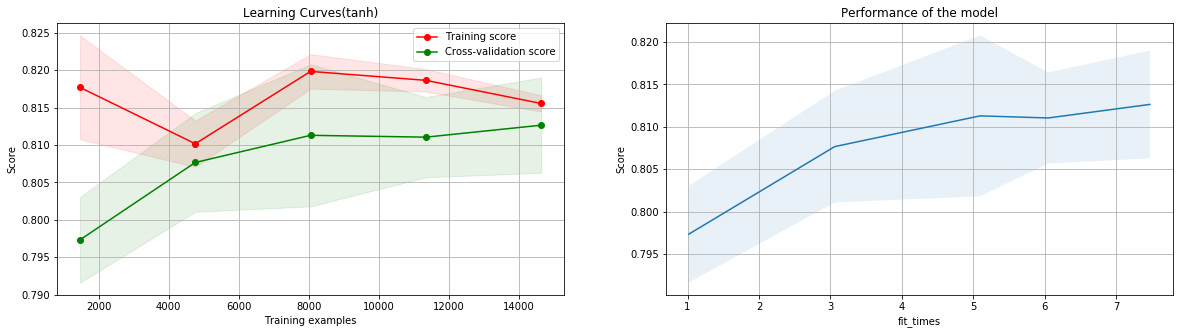

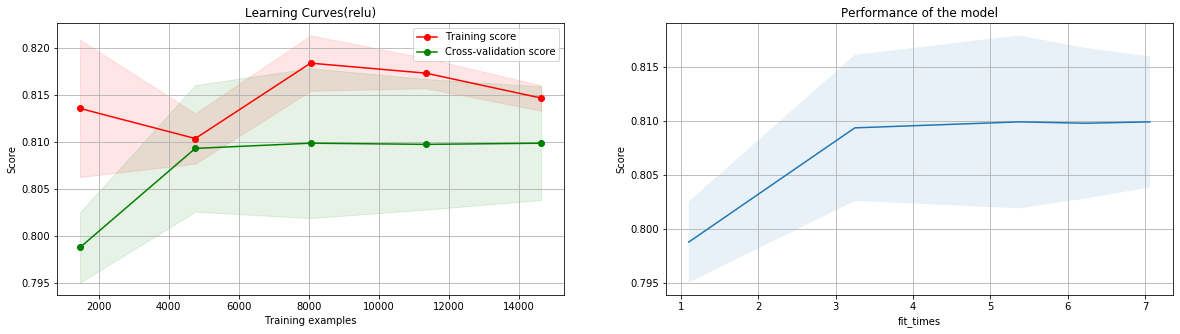

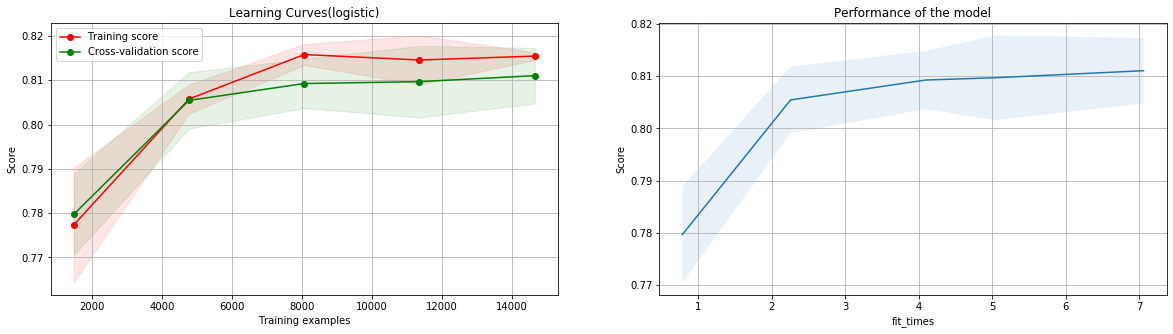

In [7]:
learningCurvePlots(clf, xTrain, yTrain, 10, 'tanh')
learningCurvePlots(clf2, xTrain, yTrain, 10, 'relu')
learningCurvePlots(clf3, xTrain, yTrain, 10, 'logistic')


In [2]:
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def bestLayersAndFunction(layersList,numberOfLayers):
    annData = pd.DataFrame(columns=['HiddenLayers','ActivationFunc','Accuracy'])
    hiddenLayers = layersList
    for index in range(numberOfLayers):
        for actFunc in ['tanh','relu', 'logistic']:
            classifier = MLPClassifier(hidden_layer_sizes=hiddenLayers[index] ,activation=actFunc,learning_rate='constant')
            accuracy = (cross_val_score(classifier,xTrainSample,yTrainSample,cv=5).mean())*100
            annData = annData.append(dict(zip(annData.columns,[hiddenLayers[index], actFunc, accuracy])), ignore_index=True)
    return annData

@ignore_warnings(category=ConvergenceWarning)
def plotActivationVsAccuracy(annData,hiddenLayers,noOfLayers):
    for index in range(noOfLayers):
        groupedData = annData[annData['HiddenLayers']==hiddenLayers[index]]
        plt.plot(groupedData['ActivationFunc'], groupedData['Accuracy'] , '-o',label = hiddenLayers[index])
    plt.ylabel("Accuracy")
    plt.xlabel("Activation Function")
    plt.title("ActivationFunction vs Accuracy")
    plt.legend( title="HiddenLayers")
    plt.ylim(70,90)
    return plt

c:\users\19722\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


<module 'matplotlib.pyplot' from 'c:\\users\\19722\\appdata\\local\\programs\\python\\python38-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

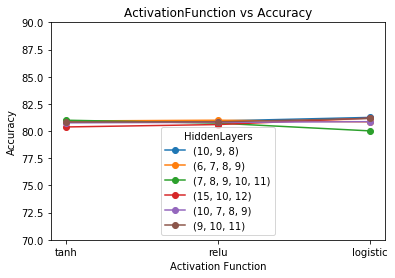

In [18]:
hiddenLayers1 = [(10, 9, 8), (6, 7, 8, 9),(7,8, 9, 10, 11)]
annData1 = bestLayersAndFunction(hiddenLayers1, 3)
plotActivationVsAccuracy(annData1, hiddenLayers1, 3)

hiddenLayers2 = [(15, 10, 12), (10, 7, 8, 9), (9, 10, 11)]
annData2 = bestLayersAndFunction(hiddenLayers2, 3)
plotActivationVsAccuracy(annData2, hiddenLayers2, 3)


[80.51491299376782, 77.52242920682757, 81.24615810199806]


<module 'matplotlib.pyplot' from 'c:\\users\\19722\\appdata\\local\\programs\\python\\python38-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

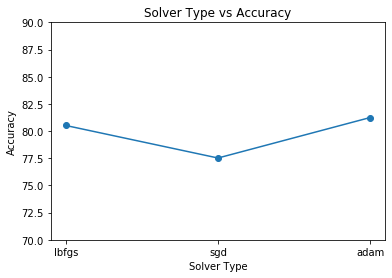

In [8]:
# activation - Logistic
# hidden layers - 3 - 10, 9, 8

@ignore_warnings(category=ConvergenceWarning)
def my_function():
    solverList = ['lbfgs', 'sgd', 'adam']
    accuracyValues = []
    for solverVal in solverList:
        clf = MLPClassifier(hidden_layer_sizes=(10,9,8), activation='logistic', solver = solverVal)
        accuracy = (cross_val_score(clf,xTrain,yTrain,cv=5).mean())*100
        accuracyValues.append(accuracy)
    print(accuracyValues)
    plt.plot(solverList, accuracyValues , '-o')
    plt.ylabel("Accuracy")
    plt.xlabel("Solver Type")
    plt.title("Solver Type vs Accuracy")
    plt.ylim(70,90)
    return plt

my_function()


In [19]:
# activation - Logistic
# hidden layers - 3 - 10, 9, 8
# solver - adam

finalClassifier = MLPClassifier(hidden_layer_sizes=(10,9,8), activation='logistic', solver = 'adam')


finalClassifier.fit(xTrain,yTrain)
yPred = finalClassifier.predict(xTest)
error_rate = zero_one_loss(yTest, yPred,normalize = True)
print("Error Rate: "+str(error_rate))
print(confusion_matrix(yPred, yTest))
print(classification_report(yPred, yTest))


Error Rate: 0.19483870967741934
[[5090 1118]
 [ 241  526]]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      6208
           1       0.32      0.69      0.44       767

    accuracy                           0.81      6975
   macro avg       0.64      0.75      0.66      6975
weighted avg       0.88      0.81      0.83      6975



c:\users\19722\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
from sklearn.neighbors import KNeighborsClassifier


print((cross_val_score(KNeighborsClassifier(n_neighbors=5),xTrain,yTrain,cv=10)).mean()*100)
print((cross_val_score(KNeighborsClassifier(n_neighbors=10),xTrain,yTrain,cv=10)).mean()*100)
print((cross_val_score(KNeighborsClassifier(n_neighbors=20),xTrain,yTrain,cv=10)).mean()*100)

78.35208679093128
79.5380548453689
80.10947780769537


In [71]:
@ignore_warnings(category=ConvergenceWarning)
def bestMetricsKNN(nValues, metricValues):
    knnData = pd.DataFrame(columns=['nValues','metric','Accuracy'])
    for value in nValues:
        for metricVal in metricValues:
            classifier = KNeighborsClassifier(n_neighbors= value, metric=metricVal)
            accuracy = (cross_val_score(classifier,xTrain,yTrain,cv=10).mean())*100
            accuracyValues.append(accuracy)
            knnData = knnData.append(dict(zip(knnData.columns,[value, metricVal, accuracy])), ignore_index=True)
    return knnData

@ignore_warnings(category=ConvergenceWarning)
def plotKNNMetrics(knnData, metrics):
    for value in metrics:
        groupedData = knnData[knnData['metric']==value]
        plt.plot(groupedData['nValues'], groupedData['Accuracy'] , '-o',label = value)
    plt.ylabel("Accuracy")
    plt.xlabel("neighbours")
    plt.title("Neighbours vs Accuracy")
    plt.legend( title="metricParam")
    plt.ylim(70,90)
    return plt



In [68]:
nValues = [5, 10, 20, 30, 50, 100]
metricValues= ['manhattan','euclidean', 'chebyshev']
knnDataSet = bestMetricsKNN(nValues, metricValues)


<module 'matplotlib.pyplot' from 'c:\\users\\19722\\appdata\\local\\programs\\python\\python38-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

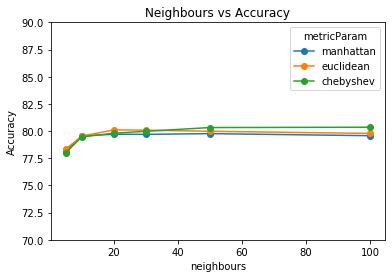

In [72]:
plotKNNMetrics(knnData= knnDataSet, metrics=metricValues)

In [74]:
classifierKNN = KNeighborsClassifier(n_neighbors= 50, metric='chebyshev')

classifierKNN.fit(xTrain,yTrain)
yPred = classifierKNN.predict(xTest)
error_rate = zero_one_loss(yTest, yPred,normalize = True)
print("Error Rate: "+str(error_rate))
print(confusion_matrix(yPred, yTest))
print(classification_report(yPred, yTest))


Error Rate: 0.2008602150537634
[[5114 1184]
 [ 217  460]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      6298
           1       0.28      0.68      0.40       677

    accuracy                           0.80      6975
   macro avg       0.62      0.75      0.64      6975
weighted avg       0.89      0.80      0.83      6975

